### Cluster the ages from the relationship subreddit

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("~/Downloads/50k-posts-from-relationship-advice.csv", header=None, names=["age1","age2","id","post_title"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47540 entries, 0 to 47539
Data columns (total 4 columns):
age1          47540 non-null int64
age2          47540 non-null int64
id            47540 non-null object
post_title    47540 non-null object
dtypes: int64(2), object(2)
memory usage: 1.5+ MB


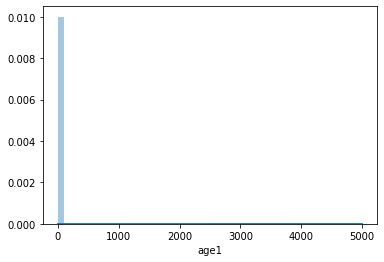

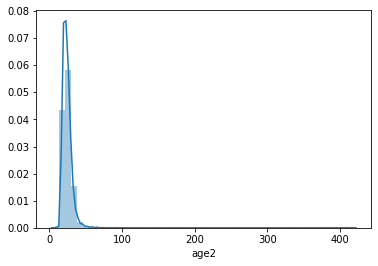

In [4]:
sns.distplot(df.age1)
plt.show()
sns.distplot(df.age2)
plt.show()

In [5]:
df.age1.value_counts(bins=10, sort=False)

(-5.001, 500.0]     47539
(500.0, 1000.0]         0
(1000.0, 1500.0]        0
(1500.0, 2000.0]        0
(2000.0, 2500.0]        0
(2500.0, 3000.0]        0
(3000.0, 3500.0]        0
(3500.0, 4000.0]        0
(4000.0, 4500.0]        0
(4500.0, 5000.0]        1
Name: age1, dtype: int64

In [6]:
df.age2.value_counts(bins=10, sort=False)

(4.584, 46.5]     47164
(46.5, 88.0]        371
(88.0, 129.5]         3
(129.5, 171.0]        0
(171.0, 212.5]        0
(212.5, 254.0]        1
(254.0, 295.5]        0
(295.5, 337.0]        0
(337.0, 378.5]        0
(378.5, 420.0]        1
Name: age2, dtype: int64

Remove ages that are greater than 100

In [7]:
df = df [(df.age1 <= 100) & (df.age2 <=100)]

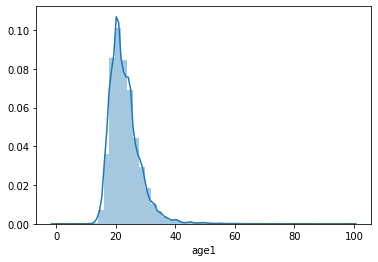

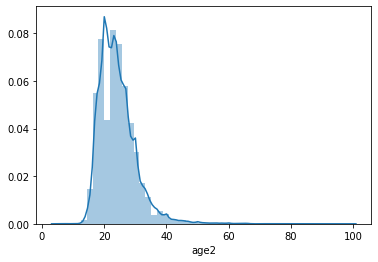

In [8]:
sns.distplot(df.age1)
plt.show()
sns.distplot(df.age2)
plt.show()

In [9]:
df.age1.value_counts(bins=10, sort=False)

(-0.1, 9.9]        14
(9.9, 19.8]     12152
(19.8, 29.7]    30943
(29.7, 39.6]     3833
(39.6, 49.5]      432
(49.5, 59.4]      120
(59.4, 69.3]       32
(69.3, 79.2]        7
(79.2, 89.1]        0
(89.1, 99.0]        3
Name: age1, dtype: int64

In [10]:
df.age2.value_counts(bins=10, sort=False)

(4.904999999999999, 14.4]      163
(14.4, 23.8]                 24389
(23.8, 33.2]                 19952
(33.2, 42.6]                  2394
(42.6, 52.0]                   464
(52.0, 61.4]                   119
(61.4, 70.8]                    47
(70.8, 80.2]                     4
(80.2, 89.6]                     1
(89.6, 99.0]                     3
Name: age2, dtype: int64

Define subset dataframe of just ages

In [11]:
df_age = df[["age1","age2"]]

In [12]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47536 entries, 0 to 47539
Data columns (total 2 columns):
age1    47536 non-null int64
age2    47536 non-null int64
dtypes: int64(2)
memory usage: 1.1 MB


Make the model, label the centers, plot the model

In [13]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(df_age)
kmeans.predict(df_age)
centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_age.columns)
centers

,age1,age2
0,20.993784,21.895885
1,33.021293,35.058555
2,17.699446,18.117175
3,27.652796,29.605177
4,24.792899,47.059172
5,46.015625,48.853125
6,24.032287,25.719114
7,49.240566,23.202830


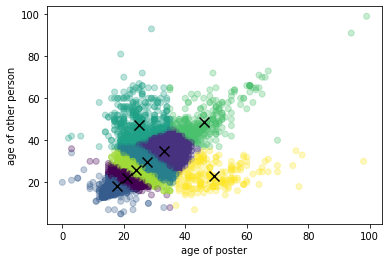

In [14]:
plt.scatter(df_age.age1, df_age.age2, c=kmeans.labels_, alpha=.3)
plt.scatter(centers.age1, centers.age2, marker="x", c="black", s=100)
plt.xlabel("age of poster")
plt.ylabel("age of other person")
plt.show()

In [15]:
df.head()

,age1,age2,id,post_title
0,24,25,3iwivb,I'm [25/M] having issues with my GF [24/F] Fac...
1,18,20,3iwrcd,I [20M] asked a friend [18F] to the movies. Di...
2,17,16,3iwucq,Me (16/M) not sure if co-worker (17/F) is bein...
3,17,16,3iwx0l,Me [16/M] Not sure if my co-worker [17/F] is b...
4,26,22,3iwx5t,Me [22/M] and my GF [26/F] having been seeing ...


Add an age difference column

In [16]:
df["age_diff"] = abs(df.age1 - df.age2)

In [17]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47536 entries, 0 to 47539
Data columns (total 5 columns):
age1          47536 non-null int64
age2          47536 non-null int64
id            47536 non-null object
post_title    47536 non-null object
age_diff      47536 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.2+ MB


,age1,age2,id,post_title,age_diff
0,24,25,3iwivb,I'm [25/M] having issues with my GF [24/F] Fac...,1
1,18,20,3iwrcd,I [20M] asked a friend [18F] to the movies. Di...,2
2,17,16,3iwucq,Me (16/M) not sure if co-worker (17/F) is bein...,1
3,17,16,3iwx0l,Me [16/M] Not sure if my co-worker [17/F] is b...,1
4,26,22,3iwx5t,Me [22/M] and my GF [26/F] having been seeing ...,4


In [18]:
df.age_diff.value_counts(bins=10, sort=False)

(-0.069, 6.8]    44074
(6.8, 13.6]       2679
(13.6, 20.4]       382
(20.4, 27.2]       174
(27.2, 34.0]       142
(34.0, 40.8]        58
(40.8, 47.6]        22
(47.6, 54.4]         1
(54.4, 61.2]         1
(61.2, 68.0]         3
Name: age_diff, dtype: int64

In [19]:
df_age = df[["age1","age_diff"]]

In [20]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_age)
kmeans.predict(df_age)
centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_age.columns)

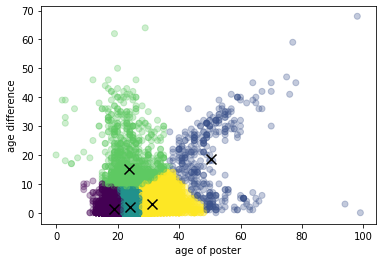

In [21]:
plt.scatter(df_age.age1, df_age.age_diff, c=kmeans.labels_, alpha=.3)
plt.scatter(centers.age1, centers.age_diff, marker="x", c="black", s=100)
plt.xlabel("age of poster")
plt.ylabel("age difference")
plt.show()

Try a 3D model just for funs

In [22]:
df_age = df[["age1","age2","age_diff"]]

In [23]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_age)
kmeans.predict(df_age)
centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_age.columns)

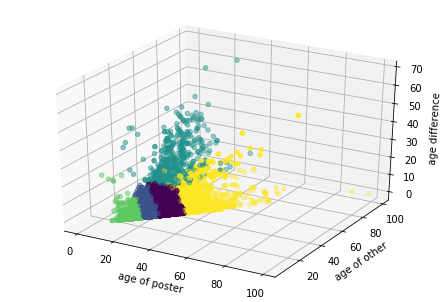

In [24]:
ax = Axes3D(plt.figure())

ax.scatter(df_age.age1, df_age.age2, df_age.age_diff, c=kmeans.labels_)
ax.set(xlabel='age of poster', ylabel='age of other', zlabel='age difference')
plt.show()